In [1]:
import os
import wave

filename = '/kaggle/input/nuaih-age-capturing-from-speech-signals/Age_Through_Speech/Age_Through_Speech/one_and_multiple/S_01_4001_VV.wav'
with wave.open(filename, "rb") as wave_file:
    frame_rate = wave_file.getframerate()
    print(frame_rate)

48000


In [ ]:
!pip install librosa
!pip install noisereduce

In [3]:
import glob
import os
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import librosa as lr
import librosa.display
import noisereduce as nr
from IPython.display import Audio
from scipy.fft import rfft, rfftfreq
from scipy.stats import mode

root_dir = '/kaggle/input/nuaih-age-capturing-from-speech-signals/Age_Through_Speech/Age_Through_Speech/one_and_multiple/'

In [4]:
# Helper Functions
def get_audio_filenames(subject):
    '''
    Parameter
    ---------
    Subject: int or string represents id of the speaker
    Return
    ------
    list of audio filenames belonging to that speaker
    '''
    return [filename for filename in audio_filenames if filename[5:9] == str(subject)]

In [5]:
df = pd.read_csv('/kaggle/input/nuaih-age-capturing-from-speech-signals/Age_Through_Speech/Age_Through_Speech/train.csv')
df_test = pd.read_csv('/kaggle/input/nuaih-age-capturing-from-speech-signals/Age_Through_Speech/Age_Through_Speech/test.csv')
audio_filenames = np.array(os.listdir(root_dir))
df['audio_count'] = df.apply(lambda row : len(get_audio_filenames(row['Subject'])), axis=1)
print('Train Speakers Count: ', len(df))
print('Test Speakers Count: ', len(df_test))

Train Speakers Count:  369
Test Speakers Count:  157


In [6]:
train_subjects = set(df['Subject'])
train_audio_filenames = [audio_filename for audio_filename in audio_filenames if int(audio_filename[5:9]) in train_subjects]
print('Total Audio File: ', len(audio_filenames))
print('Total Train Audio File: ', len(train_audio_filenames))

Total Audio File:  3964
Total Train Audio File:  2758


In [7]:
# Create a dictionary to map subjects to ages
subject_to_age = dict(zip(df['Subject'], df['Age']))

# Initialize a list to hold the data for the new DataFrame
data = []

# Loop through each audio file name in the list
for audio_filename in train_audio_filenames:
    # Extract the subject number from the filename
    subject = int(audio_filename[5:9])
        
    y, sr = librosa.load(root_dir + audio_filename,sr=48000)
    
    # Look up the age for the subject in the subject_to_age dictionary
    age = subject_to_age[subject]
    
    data.append({'audiofilename': audio_filename, 'Age': age, 'Subject': subject, 'Length': len(y)/sr, 'y':y, 'sr':sr})
    
# Create a new DataFrame from the data list
audio_df = pd.DataFrame(data)

In [8]:
audio_df.head()

,audiofilename,Age,Subject,Length,y,sr
0,S_01_4005_VE1.wav,17,4005,1.366083,"[-0.0018615723, -0.0019683838, -0.002243042, -...",48000
1,S_02_4149_VV5.wav,21,4149,1.973917,"[-0.009933472, -0.010009766, -0.0096588135, -0...",48000
2,S_02_4498_VV1.wav,19,4498,2.119583,"[-3.0517578e-05, -6.1035156e-05, -4.5776367e-0...",48000
3,S_02_4540_VE3.wav,19,4540,1.662646,"[-0.0022735596, -0.002456665, -0.0025177002, -...",48000
4,S_01_4436_VE1.wav,15,4436,1.735437,"[-0.0030059814, -0.0030517578, -0.0030670166, ...",48000


In [9]:
audio_df['Length'].describe()

count    2758.000000
mean        1.743422
std         0.622246
min         0.668312
25%         1.308641
50%         1.588927
75%         2.017391
max         6.199729
Name: Length, dtype: float64

The number of audio files of length greater than 4 is  24


<AxesSubplot:>

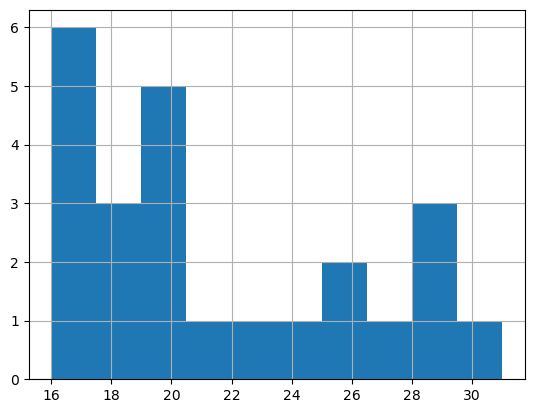

In [10]:
long_audio = audio_df[audio_df['Length']>4]['Age']
print("The number of audio files of length greater than 4 is ", len(long_audio))
long_audio.hist()

,Subject,Age,audio_count
0,4001,19,12
1,4002,23,10
2,4003,18,2
3,4004,23,2
4,4005,17,10


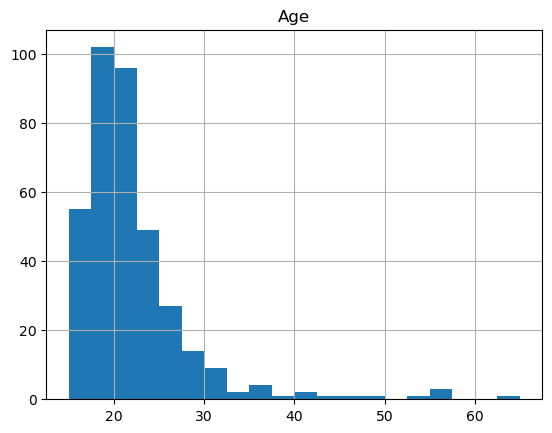

In [11]:
df.hist(column='Age', bins=20)
df.head()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

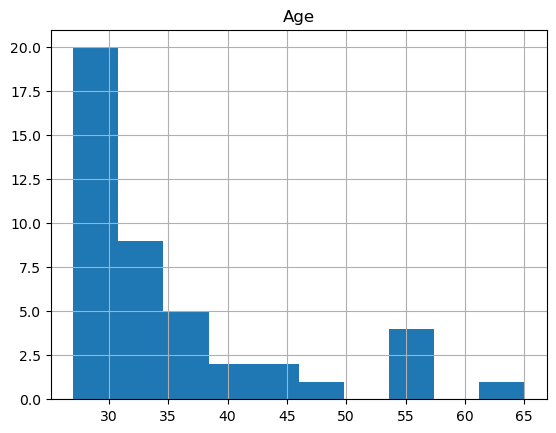

In [12]:
# Zooming in and plotting a histogram on the older ages
df[df['Age']>26].hist(column='Age')

In [13]:
# Summary of the data
df['Age'].describe()

count    369.000000
mean      21.924119
std        6.389928
min       15.000000
25%       18.000000
50%       20.000000
75%       24.000000
max       65.000000
Name: Age, dtype: float64

In [14]:
# df[df['audio_count']==20]
get_audio_filenames(4011)

['S_01_4011_VE3.wav',
 'S_02_4011_VE2.wav',
 'S_02_4011_VV4.wav',
 'S_01_4011_VV3.wav',
 'S_02_4011_VV3.wav',
 'S_02_4011_VE1.wav',
 'S_01_4011_VE5.wav',
 'S_01_4011_VV2.wav',
 'S_02_4011_VV1.wav',
 'S_01_4011_VE2.wav',
 'S_02_4011_VV5.wav',
 'S_01_4011_VV4.wav',
 'S_01_4011_VV1.wav',
 'S_01_4011_VE4.wav',
 'S_02_4011_VV2.wav',
 'S_01_4011_VV5.wav',
 'S_01_4011_VE1.wav',
 'S_02_4011_VE5.wav',
 'S_02_4011_VE4.wav',
 'S_02_4011_VE3.wav']

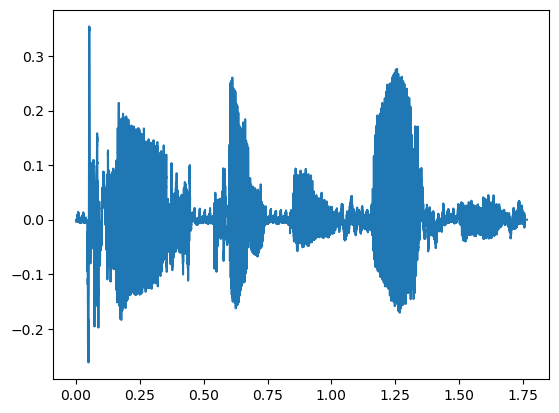

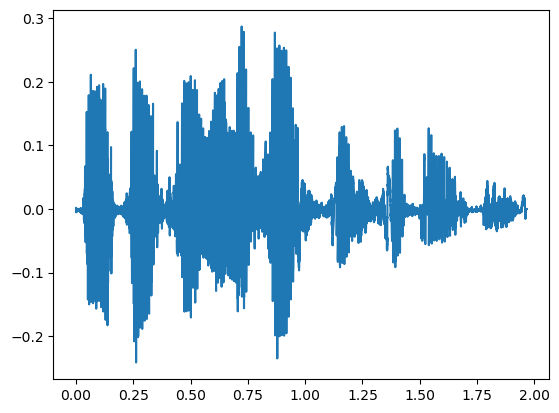

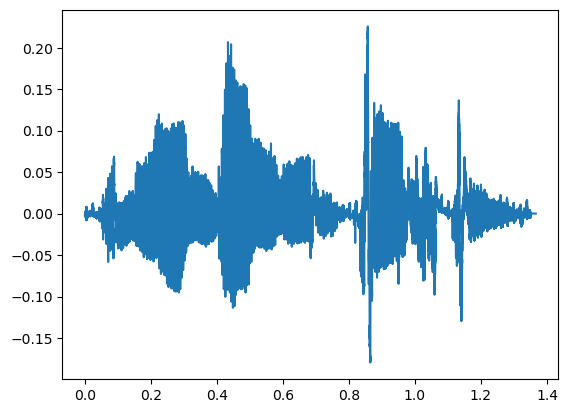

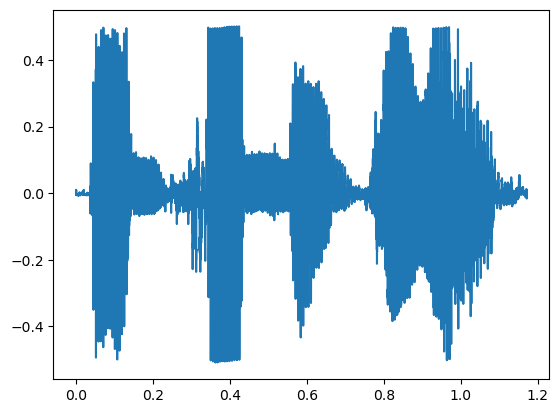

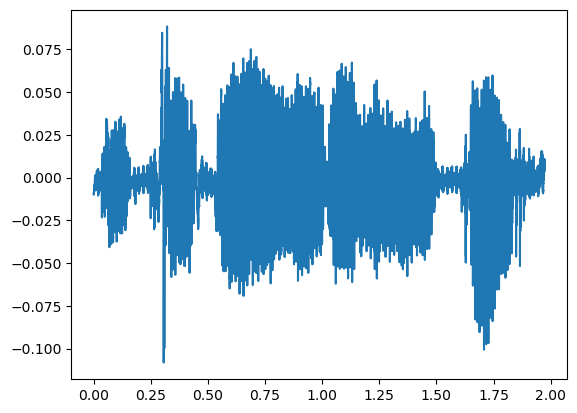

In [15]:
# Draw the waveform of 5 samples
for file in range(5):
    path = root_dir + audio_filenames[file]
    audio, sfreq = lr.load(path, sr=48000)
    fig,ax = plt.subplots()
    time = np.arange(0,len(audio))/sfreq
    ax.plot(time,audio)
    plt.show()

In [16]:
path = root_dir + audio_filenames[0]
audio_1, sfreq = lr.load(path, sr=48000)
Audio(data=audio_1, rate=sfreq)

In [17]:
path = root_dir + audio_filenames[23]
audio_2, sfreq = lr.load(path, sr=48000)
Audio(data=audio_2, rate=sfreq)

In [18]:
audio_df[audio_df['Length']>4]['Length']

139     6.069167
151     5.154833
229     4.099167
379     5.201271
485     5.318917
667     4.947167
742     4.365521
785     4.702500
902     6.199729
1051    5.233187
1311    4.047979
1315    4.469708
1513    4.040271
1656    4.417896
1715    4.945854
1806    4.017062
2006    5.363812
2054    4.038125
2172    4.520500
2182    4.112292
2227    4.077271
2238    5.131625
2704    4.043042
2747    4.469708
Name: Length, dtype: float64

In [19]:
audio_3 = audio_df['y'][902]
Audio(data=audio_3, rate=sfreq)

In [20]:
audio_4 = audio_df['y'][2747]
Audio(data=audio_4, rate=sfreq)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Pass sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Pass sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


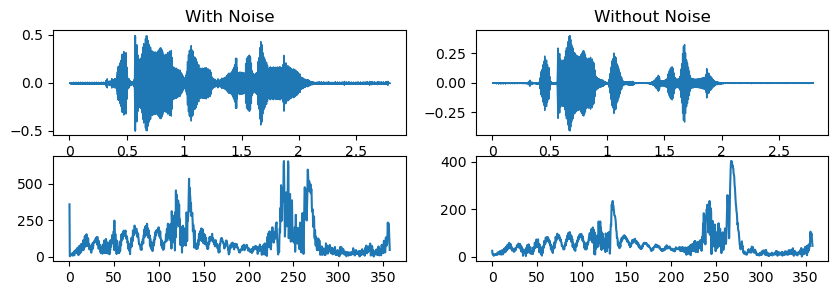

In [21]:
audio_no_noise = nr.reduce_noise(audio_2, sfreq)

N1 = len(audio_2)
yf1 = rfft(audio_2)
xf1 = rfftfreq(N1, 1 / sfreq)

N2 = len(audio_no_noise)
yf2 = rfft(audio_no_noise)
xf2 = rfftfreq(N2, 1 / sfreq)

plt.rcParams['figure.figsize'] = (10,3)
plt.subplot(221)
librosa.display.waveshow(audio_2, sfreq)
plt.title('With Noise')
plt.subplot(222)
librosa.display.waveshow(audio_no_noise, sfreq)
plt.title('Without Noise')
plt.subplot(223)
plt.plot(xf1[:1000], np.abs(yf1[:1000]))
plt.subplot(224)
plt.plot(xf2[:1000], np.abs(yf2[:1000]))

In [22]:
Audio(data=audio_no_noise, rate=sfreq)

# The exploration shows that the data is imbalanced, have noise, audios are of different length and there are silent periods.